# PoGaIN: Poisson-Gaussian Image Noise Modeling from Paired Samples

Authors: Nicolas Bähler, Majed El Helou, Étienne Objois, Kaan Okumuş, and Sabine
Süsstrunk, _Fellow_, _IEEE_.

This Jupyter notebook is simply showing how our estimation approaches can be
used and how the log-likelihood can be computed.


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

from implementations import var, ours, log_likelihood
from utils import (
    add_noise,
    load_image,
)

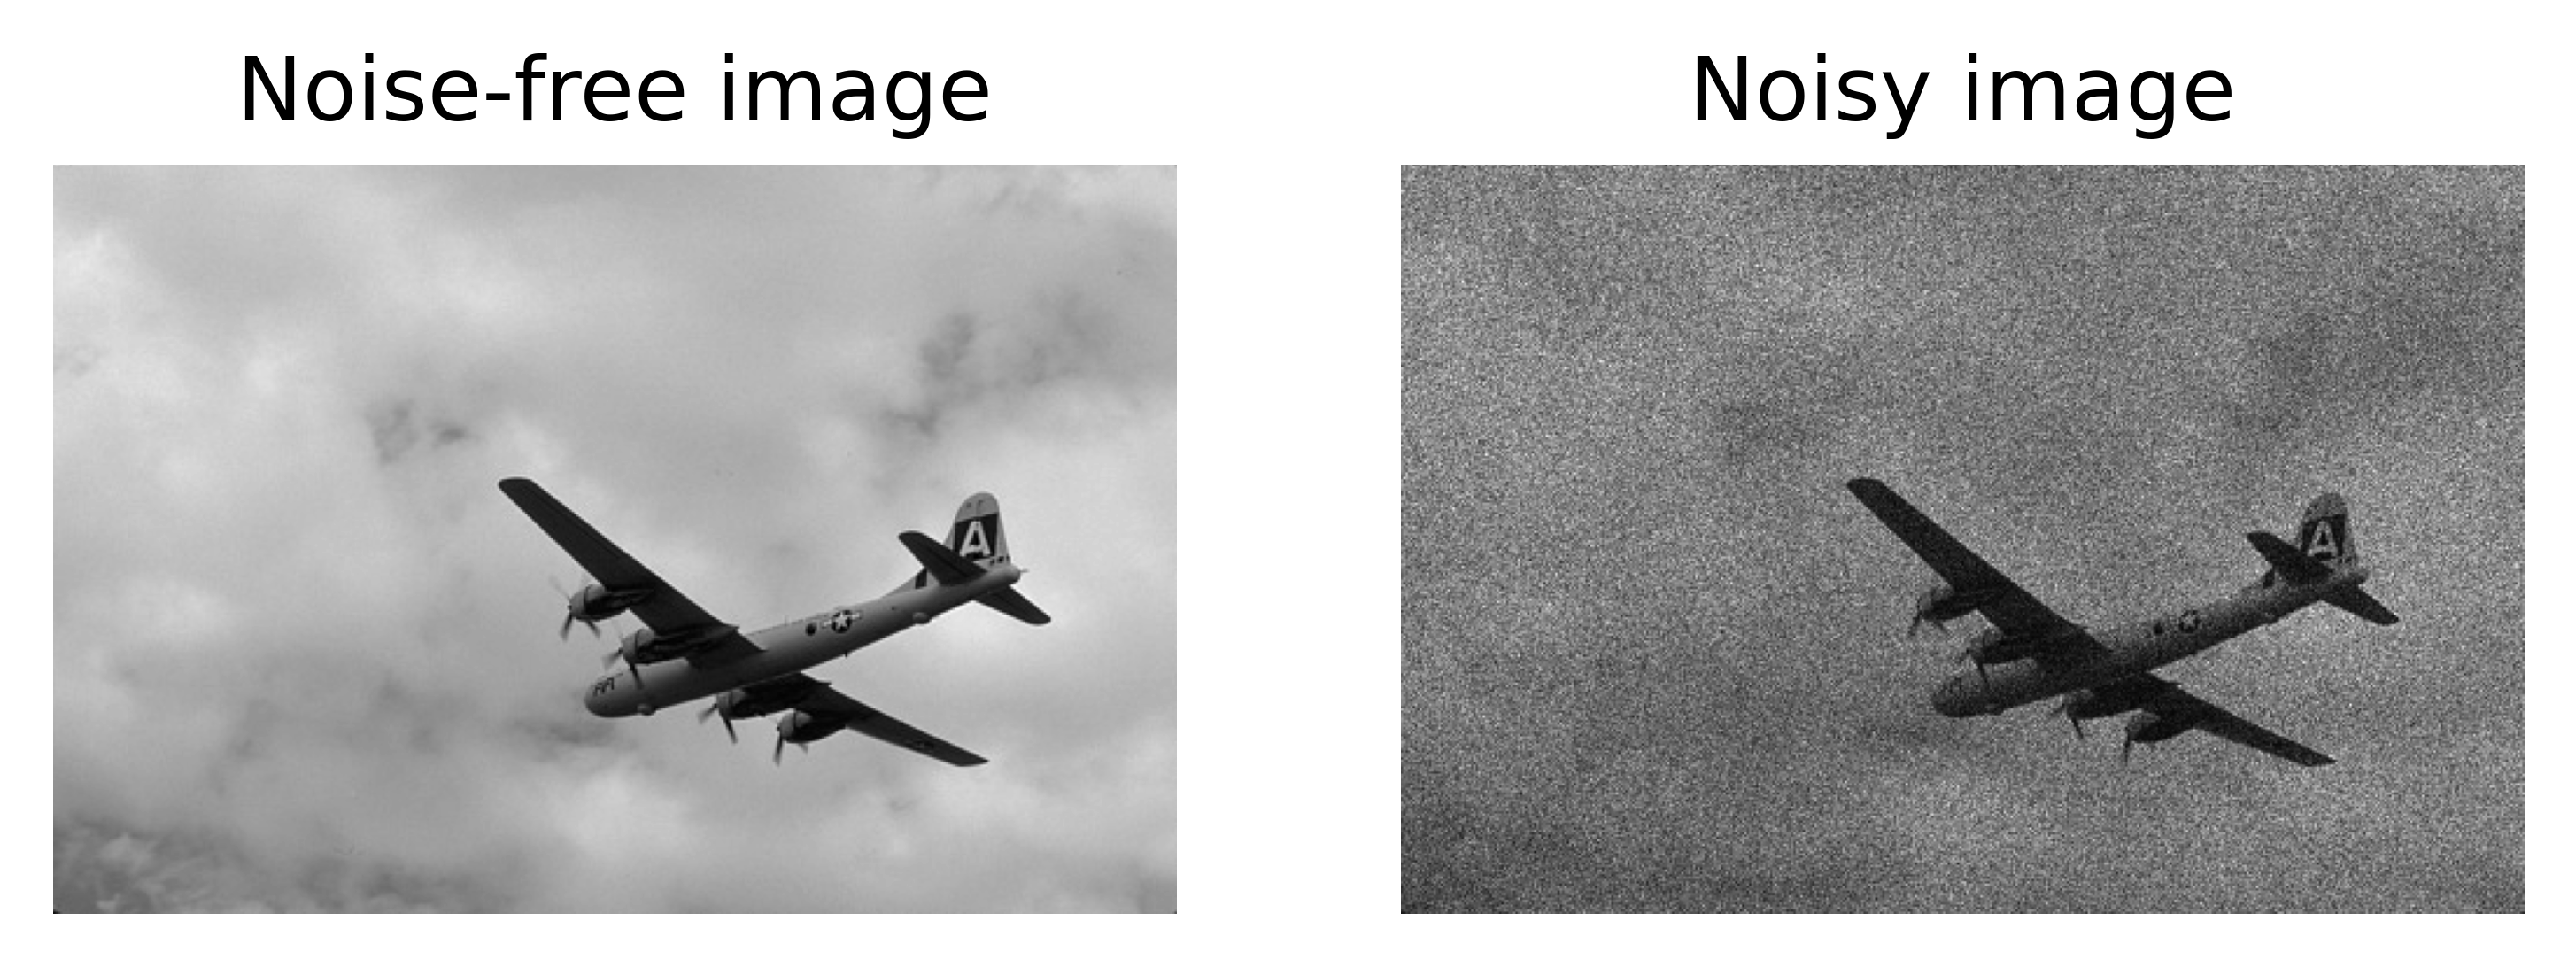

In [2]:
# Define parameters
a = 45
b = 0.015
s = 42

# Load noise-free image
x, shape = load_image("BSDS300/images/test/3096.jpg")

# Synthesize and add noise to image
y = add_noise(x, a, b, s)

# Show noise-free image
fig, axs = plt.subplots(1, 2, figsize=(6, 9), dpi=600)
axs[0].axis("off")
axs[1].axis("off")
axs[0].imshow(x.reshape(shape), cmap="gray")
axs[1].imshow(y.reshape(shape), cmap="gray")
axs[0].title.set_text("Noise-free image")
axs[1].title.set_text("Noisy image")
plt.show()


In [3]:
# Compute the estimates using our two approaches
a_v, b_v = var(x, y)
a_c, b_c = ours(x, y)

# Compute the log-likelihood for the ground truth parameters
ll = log_likelihood(x, y, a, b, k_max=100)

# Display the results
print("===============")
print("Ground truth:")
print(f"a={a}")
print(f"b={b}")
print("===============")
print("Log-likelihood:")
print(f"LL={round(ll, 3)}")
print("===============")
print("VAR:")
print(f"a={round(a_v, 5)}")
print(f"b={round(b_v, 5)}")
print("===============")
print("OURS:")
print(f"a={round(a_c, 5)}")
print(f"b={round(b_c, 5)}")
print("===============")


Ground truth:
a=45
b=0.015
Log-likelihood:
LL=135530.152
VAR:
a=44.96868
b=0.01517
OURS:
a=45.3798
b=0.01819
